In [44]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
# 데이터 파일 불러오기

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [46]:
# 데이터 파일 확인
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
id                     114 non-null int64
Species                114 non-null object
Island                 114 non-null object
Clutch Completion      114 non-null object
Culmen Length (mm)     114 non-null float64
Culmen Depth (mm)      114 non-null float64
Flipper Length (mm)    114 non-null int64
Sex                    111 non-null object
Delta 15 N (o/oo)      111 non-null float64
Delta 13 C (o/oo)      111 non-null float64
Body Mass (g)          114 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
id                     228 non-null int64
Species                228 non-null object
Island                 228 non-null object
Clutch Completion      228 non-null object
Culmen Length (mm)     228 non-null float64
Culmen Depth (mm)      228 non-nul

In [47]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64
id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64


In [48]:
# 결측치 처리 (성별, 동위원소)
# 성별은 train data에서 종, 서식지, 사이즈가 비슷한 다른 개체 정보를 기준으로 결측값 결정
# 동위원소는 train data 평균값으로 대체

In [49]:
# 정보가 비슷한 개체들 확인

train[(train['Species']=='Gentoo penguin (Pygoscelis papua)') & (train['Island']=='Biscoe')]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
5,5,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,51.1,16.5,225,MALE,8.20660,-26.36863,5250
9,9,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.7,15.0,216,FEMALE,8.53018,-26.72751,4750
12,12,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.6,14.2,210,FEMALE,8.38289,-26.86352,4850
13,13,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,43.5,14.2,220,FEMALE,8.64931,-26.68867,4700
15,15,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.1,15.0,225,MALE,8.50153,-26.61414,5000
16,16,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.5,213,FEMALE,7.90436,-25.39470,4400


In [50]:
# 성별 결측치 처리

train.iloc[70,7]='FEMALE'
train.iloc[6,7]='MALE'
train.iloc[8,7]='FEMALE'

In [51]:
test.iloc[46,7]='FEMALE'
test.iloc[81,7]='MALE'
test.iloc[98,7]='FEMALE'
test.iloc[152,7]='FEMALE'
test.iloc[205,7]='FEMALE'
test.iloc[209,7]='FEMALE'

In [52]:
# 동위원소 결측치 처리

idx = [8,18,109]
mean_N = train['Delta 15 N (o/oo)'].mean()
mean_C = train['Delta 13 C (o/oo)'].mean()
for i in idx:
    train.iloc[i,8] = mean_N
    train.iloc[i,9] = mean_C

In [53]:
idx = [27,81,106,159,175,202,205,215]
for i in idx:
    test.iloc[i,8] = mean_N
    test.iloc[i,9] = mean_C

test.iloc[75,8]=mean_N # 75번의 경우 N만 Nan이므로 따로 지정해줌

In [54]:
# 특성별 상관계수 확인

corr_df = train.corr()
corr_df

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,1.000000,0.078787,-0.144788,0.077909,-0.034522,0.023754,0.089186
Culmen Length (mm),0.078787,1.000000,-0.251255,0.672205,-0.038911,0.111280,0.572063
Culmen Depth (mm),-0.144788,-0.251255,1.000000,-0.603341,0.645813,0.474151,-0.490643
Flipper Length (mm),0.077909,0.672205,-0.603341,1.000000,-0.524236,-0.446668,0.864814
Delta 15 N (o/oo),-0.034522,-0.038911,0.645813,-0.524236,1.000000,0.641107,-0.543740
Delta 13 C (o/oo),0.023754,0.111280,0.474151,-0.446668,0.641107,1.000000,-0.464210
Body Mass (g),0.089186,0.572063,-0.490643,0.864814,-0.543740,-0.464210,1.000000


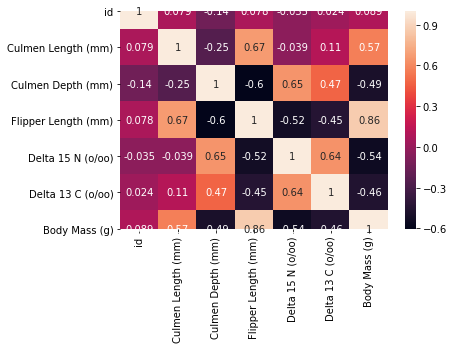

In [55]:
# 상관계수 시각화 -> 13C, Culmen length 컬럼 삭제

sns.heatmap(corr_df, annot=True);

In [56]:
# encoding -> one hot encoding

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [57]:
# 데이터 준비: X,y 분할하기

from sklearn.model_selection import train_test_split

X = train.drop(['id','Body Mass (g)','Delta 13 C (o/oo)','Culmen Length (mm)'], axis=1)
y = train['Body Mass (g)']

#학습용 데이터와 검증용 데이터로 분할하기

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [58]:
# 훈련데이터, 테스트 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 회귀 모델 생성 (SGD)

In [59]:
# 평가 함수 정의

def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("mse: {:.3f}".format(mse))
    print("rmse: {:.3f}".format(rmse))
    print("r2: {:.3f}".format(r2))
    
    return

In [60]:
# SGD regressor 사용
from sklearn.linear_model import SGDRegressor

# 객체 생성
sgd_reg = SGDRegressor(max_iter =1000, eta0=0.01)

# 학습
sgd_reg.fit(X_train_scaled, y_train)

# 회귀 계수 및 절편
print(sgd_reg.coef_, sgd_reg.intercept_)

# 성능평가
y_train_pred = sgd_reg.predict(X_train_scaled)
y_test_pred = sgd_reg.predict(X_test_scaled)
evaluate_score(y_train, y_train_pred)
evaluate_score(y_test, y_test_pred)

[ 10.1558589  309.23071277 -40.28109812 -12.86413492 270.07167737
 -64.51788675 -31.29394727 -13.5426911  233.87333969] [4206.95674022]
mse: 75026.772
rmse: 273.910
r2: 0.867
mse: 109793.473
rmse: 331.351
r2: 0.816


In [61]:
# 제출 파일 생성
X = test.drop(['id','Delta 13 C (o/oo)','Culmen Length (mm)'], axis=1)

X_scaled = scaler.transform(X)
sgd_reg.predict(X_scaled)

submission = pd.read_csv('./sample_submission.csv')
submission['Body Mass (g)'] = sgd_reg.predict(X_scaled)

submission.to_csv('./sample_submission.csv', index=False)